In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
df = pd.read_csv('data/outdoor-temperature-hourly.csv')
df = df[df.temperature != 'DIFF']

df['ds'] = df['time']
df['y'] = df['temperature']
df = df.drop(['name', 'time', 'temperature', 'seriesA', 'seriesB'], axis=1)
df.head(10)

,ds,y
0,2016-02-10T11:00:00Z,1.7
1,2016-02-10T12:00:00Z,1.983333333
2,2016-02-10T13:00:00Z,1.683333333
3,2016-02-10T14:00:00Z,1.6
4,2016-02-10T15:00:00Z,NaN
5,2016-02-10T16:00:00Z,NaN
6,2016-02-10T17:00:00Z,0.4
7,2016-02-10T18:00:00Z,-0.01666666667
8,2016-02-10T19:00:00Z,-0.28
9,2016-02-10T20:00:00Z,NaN


## Fit model and use it to make predictions

In [5]:
model = Prophet()
model.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
future = model.make_future_dataframe(periods=24*50, freq = 'H')
future.tail()

,ds
10320,2017-04-15 15:00:00
10321,2017-04-15 16:00:00
10322,2017-04-15 17:00:00
10323,2017-04-15 18:00:00
10324,2017-04-15 19:00:00


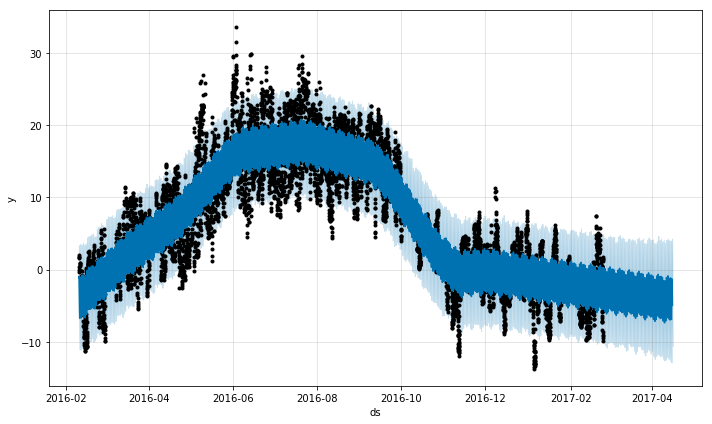

In [7]:
forecast = model.predict(future)
model.plot(forecast)

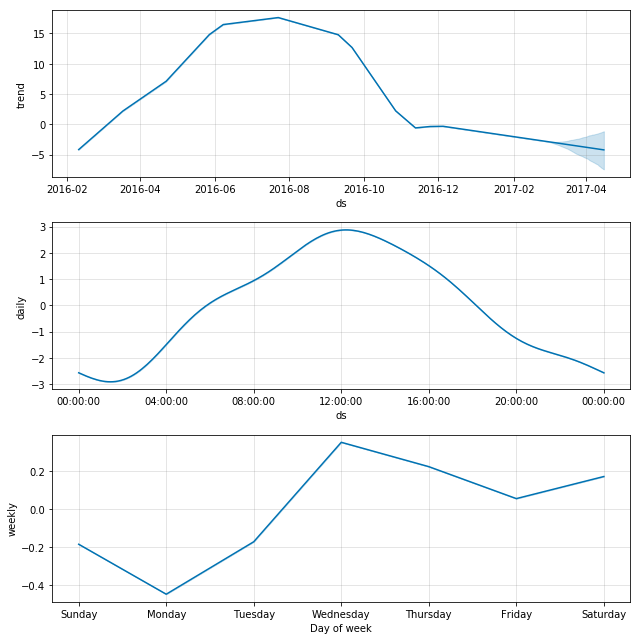

In [8]:
model.plot_components(forecast)

### Tuning the model to only cover 2017

In [9]:
recent = df[df.ds > '2017-01-01']

In [11]:
model_recent = Prophet()
model_recent.fit(recent)
future_recent = model_recent.make_future_dataframe(periods=24*10, freq='H')
forecast_recent = model_recent.predict(future_recent)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


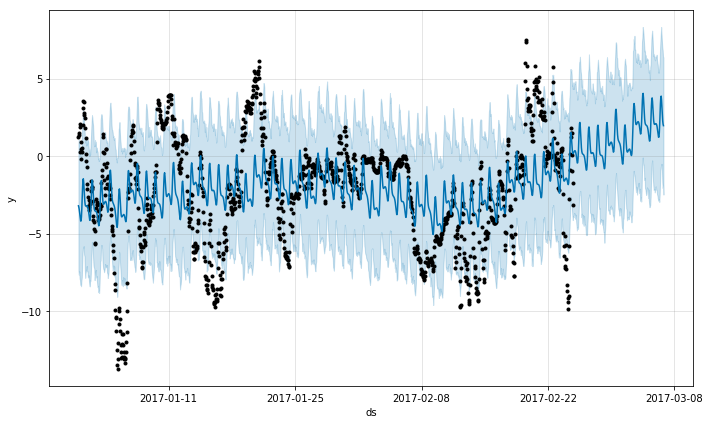

In [13]:
model_recent.plot(forecast_recent)

### generatig a csv file with only temperature values for timestaps that contain T12

In [27]:
%%sh 
head -1 ./data/outdoor-temperature-hourly.csv > ./data/outdoor-temperature-12UTC.csv
fgrep "T12" ./data/outdoor-temperature-hourly.csv >> ./data/outdoor-temperature-12UTC.csv

In [37]:
df2 = pd.read_csv('./data/outdoor-temperature-12UTC.csv', na_values = 'DIFF')
df2['ds'] = df2['time']
df2['y'] = df2['temperature']
df2 = df2.drop(['name', 'time', 'temperature', 'seriesA', 'seriesB'], axis=1)
df2.head(10)

,ds,y
0,2016-02-10T12:00:00Z,1.983333
1,2016-02-11T12:00:00Z,0.922222
2,2016-02-12T12:00:00Z,-0.260000
3,2016-02-13T12:00:00Z,-2.566667
4,2016-02-14T12:00:00Z,-4.300000
5,2016-02-15T12:00:00Z,-0.366667
6,2016-02-16T12:00:00Z,-2.866667
7,2016-02-17T12:00:00Z,2.250000
8,2016-02-18T12:00:00Z,-1.166667
9,2016-02-19T12:00:00Z,0.233333


In [38]:
model2 = Prophet()
model2.fit(df2)
future2 = model2.make_future_dataframe(periods=30)
forecast2 = model2.predict(future2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


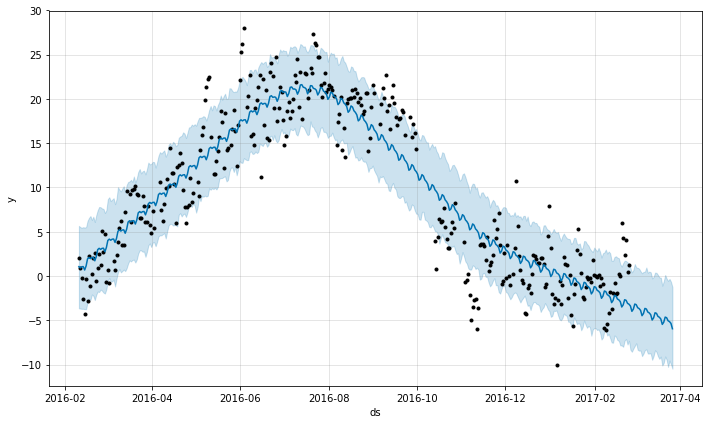

In [39]:
model2.plot(forecast2)

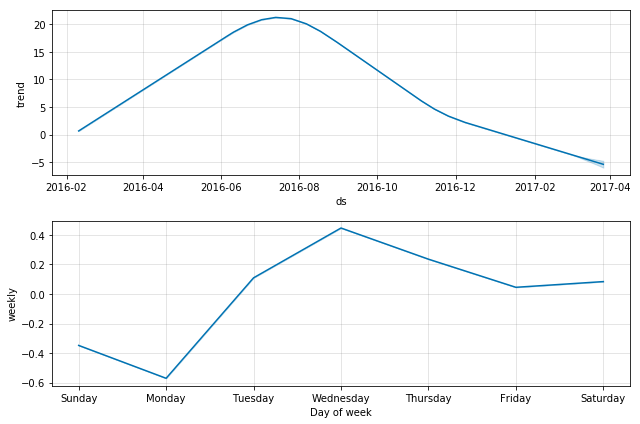

In [40]:
model2.plot_components(forecast2)

In [43]:
import datetime
forecast2[forecast2.ds > datetime.datetime.now()]
forecast2.head(10)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2016-02-10 12:00:00,0.677487,0.677487,0.677487,-3.646329,5.669223,0.374445,0.374445,0.374445,0.374445,0.374445,0.374445,0.374445,0.374445,0.374445,1.051932
1,2016-02-11 12:00:00,0.825691,0.825691,0.825691,-3.679713,5.515708,0.102090,0.102090,0.102090,0.102090,0.102090,0.102090,0.102090,0.102090,0.102090,0.927781
2,2016-02-12 12:00:00,0.973895,0.973895,0.973895,-3.705768,5.446229,0.072996,0.072996,0.072996,0.072996,0.072996,0.072996,0.072996,0.072996,0.072996,1.046890
3,2016-02-13 12:00:00,1.122099,1.122099,1.122099,-3.701822,5.513978,-0.058577,-0.058577,-0.058577,-0.058577,-0.058577,-0.058577,-0.058577,-0.058577,-0.058577,1.063522
4,2016-02-14 12:00:00,1.270303,1.270303,1.270303,-3.739318,5.470368,-0.589459,-0.589459,-0.589459,-0.589459,-0.589459,-0.589459,-0.589459,-0.589459,-0.589459,0.680843
5,2016-02-15 12:00:00,1.418506,1.418506,1.418506,-3.753530,5.521125,-0.274467,-0.274467,-0.274467,-0.274467,-0.274467,-0.274467,-0.274467,-0.274467,-0.274467,1.144039
6,2016-02-16 12:00:00,1.566710,1.566710,1.566710,-2.924297,6.229634,0.372973,0.372973,0.372973,0.372973,0.372973,0.372973,0.372973,0.372973,0.372973,1.939684
7,2016-02-17 12:00:00,1.714914,1.714914,1.714914,-2.544764,6.569312,0.374445,0.374445,0.374445,0.374445,0.374445,0.374445,0.374445,0.374445,0.374445,2.089359
8,2016-02-18 12:00:00,1.863118,1.863118,1.863118,-2.701898,6.771068,0.102090,0.102090,0.102090,0.102090,0.102090,0.102090,0.102090,0.102090,0.102090,1.965208
9,2016-02-19 12:00:00,2.011322,2.011322,2.011322,-2.084739,6.327281,0.072996,0.072996,0.072996,0.072996,0.072996,0.072996,0.072996,0.072996,0.072996,2.084317


In [ ]:
model2 = Prophet(mcmc_samples=500)
model2.fit(df2)
future2 = model2.make_future_dataframe(periods=30)
forecast2 = model2.predict(future2)

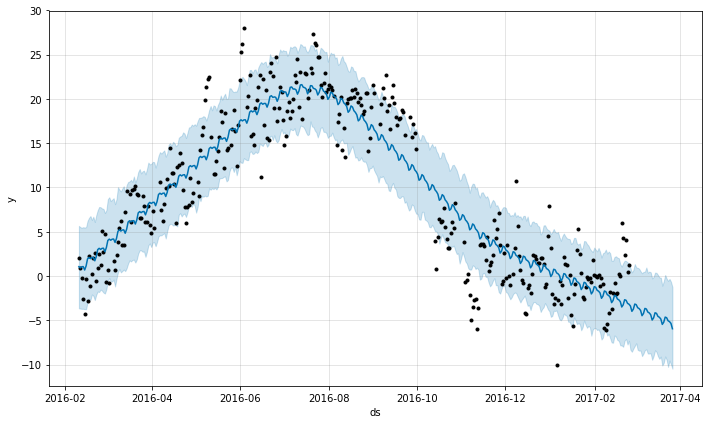

In [44]:
model2.plot(forecast2)

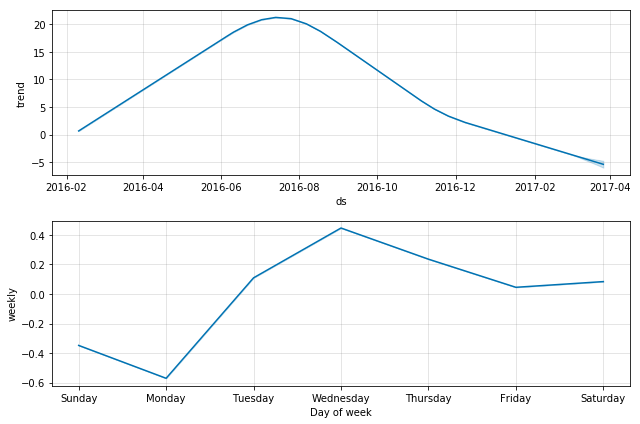

In [45]:
model2.plot_components(forecast2)